In [5]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

db_params = {
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost'
}

def fetch_data(query):
    with psycopg2.connect(**db_params) as conn:
        return pd.read_sql_query(query, conn)

query_posts = """
    SELECT DATE(created_utc) AS date, COUNT(*) AS count
    FROM Reddit_Posts_Politics
    GROUP BY DATE(created_utc)
    ORDER BY DATE(created_utc);
"""

politics_posts = fetch_data(query_posts)


/tmp/ipykernel_221170/3622957239.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)


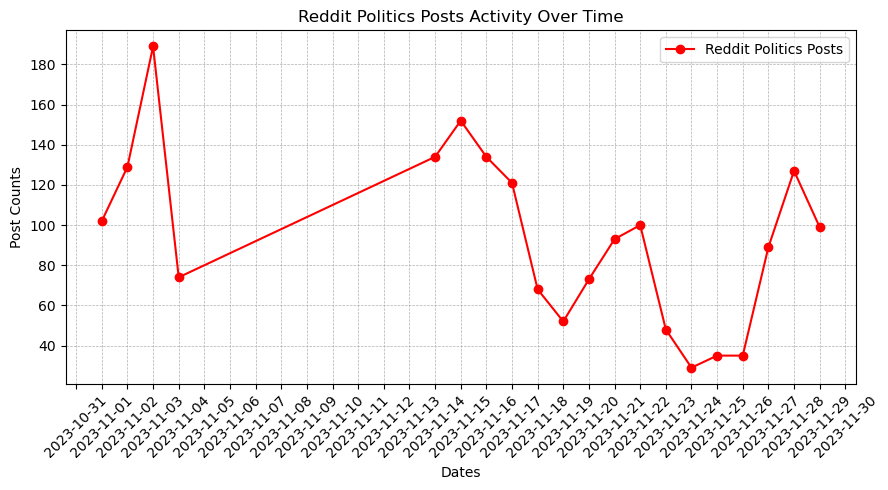

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

politics_posts['date'] = pd.to_datetime(politics_posts['date'])

plt.figure(figsize=(9,5))

plt.plot(politics_posts['date'], politics_posts['count'], color='r', marker='o', label='Reddit Politics Posts')

plt.xlabel("Dates")
plt.ylabel("Post Counts")
plt.title("Reddit Politics Posts Activity Over Time")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

db_params = {
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost'
}

def fetch_data(query):
    with psycopg2.connect(**db_params) as conn:
        return pd.read_sql_query(query, conn)


query_comments_hourly = """
    SELECT DATE_TRUNC('hour', created_utc) AS date_hour, COUNT(*) AS count
    FROM Reddit_Comments_Politics
    GROUP BY DATE_TRUNC('hour', created_utc)
    ORDER BY DATE_TRUNC('hour', created_utc);
"""

politics_comments_hourly = fetch_data(query_comments_hourly)


/tmp/ipykernel_221170/1867691677.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)


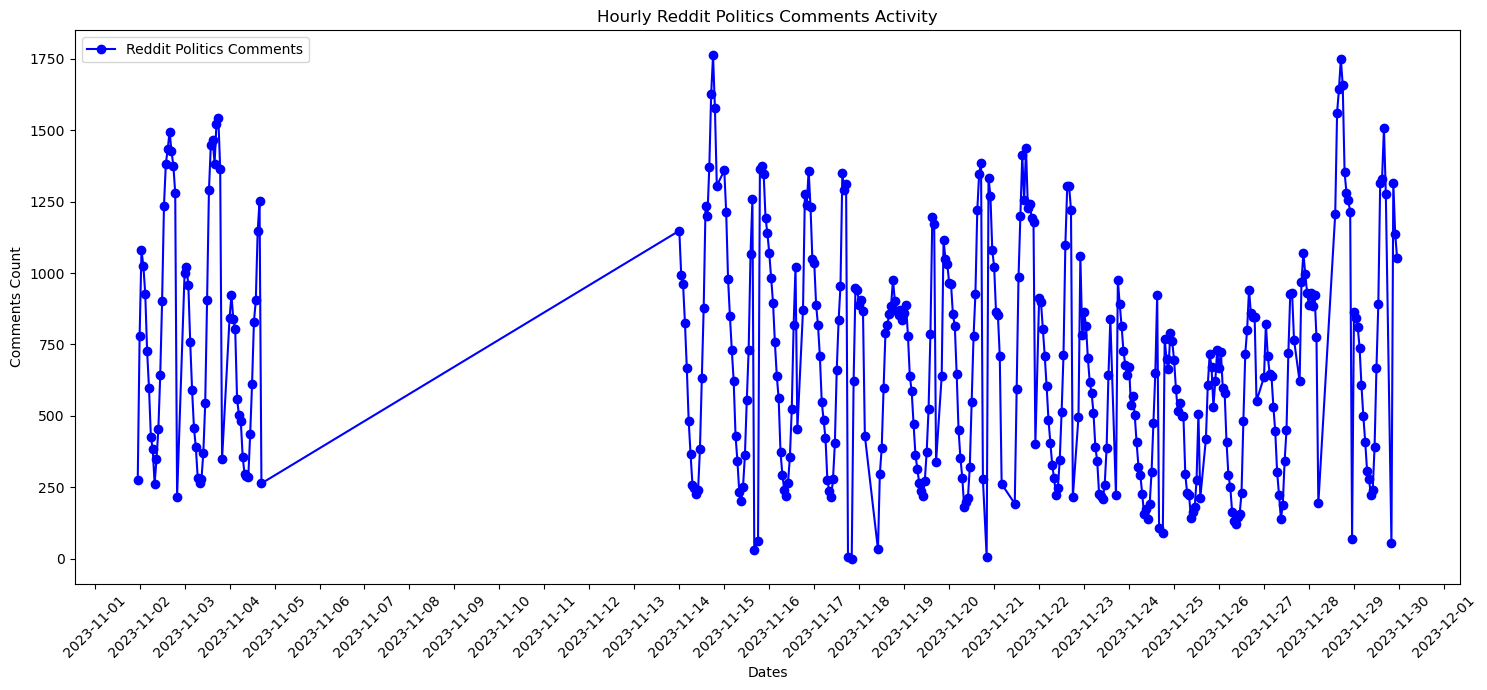

In [31]:
import matplotlib.dates as mdates

politics_comments_hourly['date_hour'] = pd.to_datetime(politics_comments_hourly['date_hour'])

plt.figure(figsize=(15,7))

plt.plot(politics_comments_hourly['date_hour'], politics_comments_hourly['count'], color='b', marker='o', label='Reddit Politics Comments')

plt.xlabel("Dates")
plt.ylabel("Comments Count")
plt.title("Hourly Reddit Politics Comments Activity")
plt.legend()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [32]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

db_params = {
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost'
}

def fetch_data(query):
    with psycopg2.connect(**db_params) as conn:
        return pd.read_sql_query(query, conn)

query_hate_speech = """
    SELECT DATE(created_utc) AS date, COUNT(*) AS count
    FROM hate_speech
    WHERE subreddit = 'wallstreetbets' AND is_hate_speech = TRUE
    GROUP BY DATE(created_utc)
    ORDER BY DATE(created_utc);
"""

query_no_hate_speech = """
    SELECT DATE(created_utc) AS date, COUNT(*) AS count
    FROM hate_speech
    WHERE subreddit = 'wallstreetbets' AND is_hate_speech = FALSE
    GROUP BY DATE(created_utc)
    ORDER BY DATE(created_utc);
"""

hate_speech_data = fetch_data(query_hate_speech)
hate_no_speech_data = fetch_data(query_no_hate_speech)



/tmp/ipykernel_221170/2245348753.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/tmp/ipykernel_221170/2245348753.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)


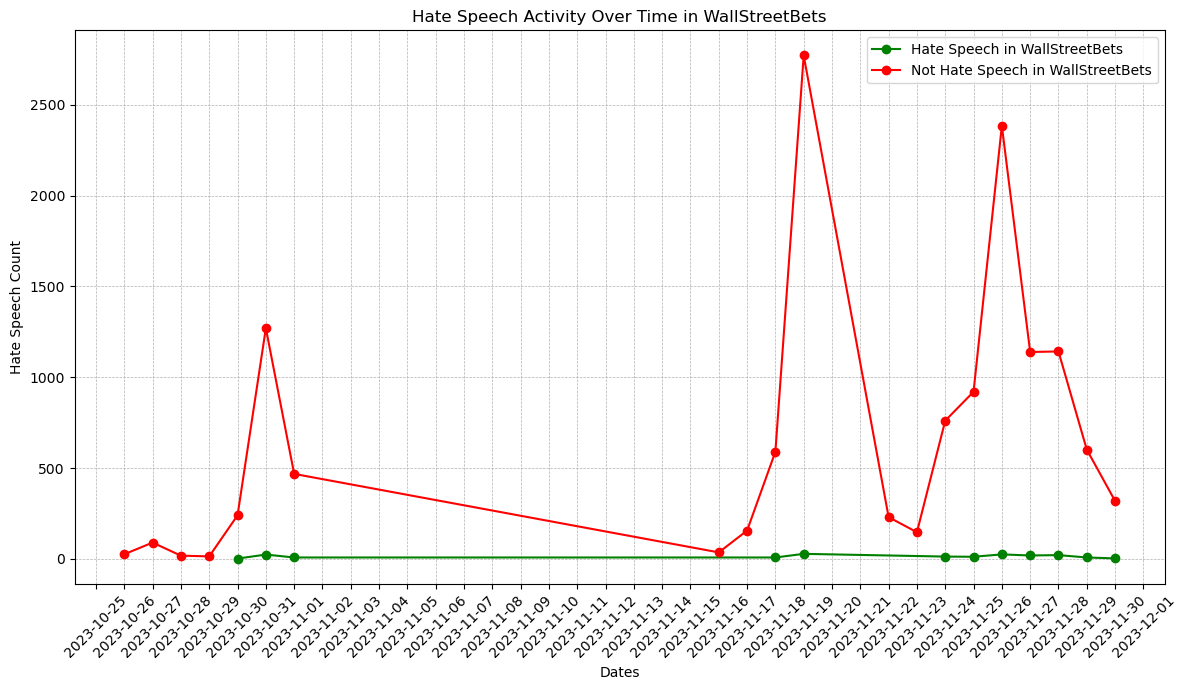

In [33]:
hate_speech_data['date'] = pd.to_datetime(hate_speech_data['date'])

hate_no_speech_data['date'] = pd.to_datetime(hate_no_speech_data['date'])


import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting
plt.figure(figsize=(12,7))

plt.plot(hate_speech_data['date'], hate_speech_data['count'], color='g', marker='o', label='Hate Speech in WallStreetBets')

plt.plot(hate_no_speech_data['date'], hate_no_speech_data['count'], color='r', marker='o', label='Not Hate Speech in WallStreetBets')


plt.xlabel("Dates")
plt.ylabel("Hate Speech Count")
plt.title("Hate Speech Activity Over Time in WallStreetBets")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np



db_params = {
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost'
}

def fetch_data(query):
    with psycopg2.connect(**db_params) as conn:
        return pd.read_sql_query(query, conn)

query_posts = """
    SELECT DATE(created_utc) AS date, COUNT(*) AS count
    FROM RedditPosts
    GROUP BY DATE(created_utc)
    ORDER BY DATE(created_utc);
"""
query_comments = """
    SELECT DATE(created_utc) AS date, COUNT(*) AS count
    FROM RedditComments
    GROUP BY DATE(created_utc)
    ORDER BY DATE(created_utc);
"""
query_stocks = """
    SELECT DATE(Date) AS date, COUNT(*) AS count
    FROM TrendingStocks
    GROUP BY DATE(Date)
    ORDER BY DATE(Date);
"""

posts_data = fetch_data(query_posts)
comments_data = fetch_data(query_comments)
stocks_data = fetch_data(query_stocks)

/tmp/ipykernel_221170/2825014327.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/tmp/ipykernel_221170/2825014327.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)
/tmp/ipykernel_221170/2825014327.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)


In [41]:
posts_data['date'] = pd.to_datetime(posts_data['date'])
comments_data['date'] = pd.to_datetime(comments_data['date'])
stocks_data['date'] = pd.to_datetime(stocks_data['date'])

combined_data = posts_data.merge(comments_data, on='date', how='outer').merge(stocks_data, on='date', how='outer').fillna(0)
combined_data.columns = ['date', 'posts_count', 'comments_count', 'stocks_count']

combined_data['date'] = pd.to_datetime(combined_data['date'])

start_date = pd.to_datetime("2023-11-01")
end_date = pd.to_datetime("2023-11-30")

filtered_data = combined_data[(combined_data['date'] >= start_date) & (combined_data['date'] <= end_date)]


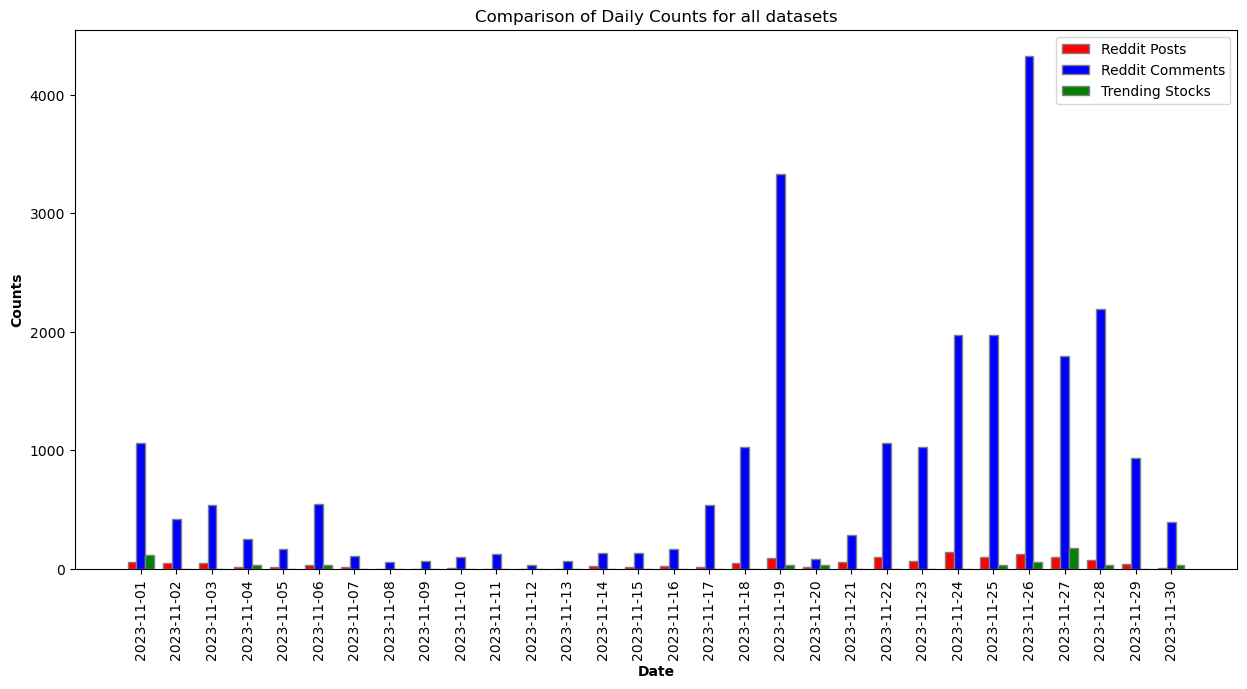

In [43]:


filtered_data['date'] = pd.to_datetime(filtered_data['date'])

filtered_data = filtered_data.sort_values('date')

bar_width = 0.25

r1 = np.arange(len(filtered_data['date']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(15,7))

plt.bar(r1, filtered_data['posts_count'], color='r', width=bar_width, edgecolor='grey', label='Reddit Posts')
plt.bar(r2, filtered_data['comments_count'], color='b', width=bar_width, edgecolor='grey', label='Reddit Comments')
plt.bar(r3, filtered_data['stocks_count'], color='g', width=bar_width, edgecolor='grey', label='Trending Stocks')

plt.xlabel('Date', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(filtered_data['date']))], filtered_data['date'].dt.strftime('%Y-%m-%d'), rotation=90)

plt.title('Comparison of Daily Counts for all datasets')
plt.legend()

plt.legend()
plt.show()


In [1]:
import psycopg2
import pandas as pd

db_params = {
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost'
}

def fetch_data(query):
    with psycopg2.connect(**db_params) as conn:
        return pd.read_sql_query(query, conn)

import pandas as pd

query = """
    SELECT subreddit, DATE(created_utc) AS date, COUNT(*) AS post_count
    FROM RedditPosts
    GROUP BY subreddit, DATE(created_utc)
    ORDER BY subreddit, DATE(created_utc);
"""

subreddit_data = fetch_data(query)


/tmp/ipykernel_243222/3162989506.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)


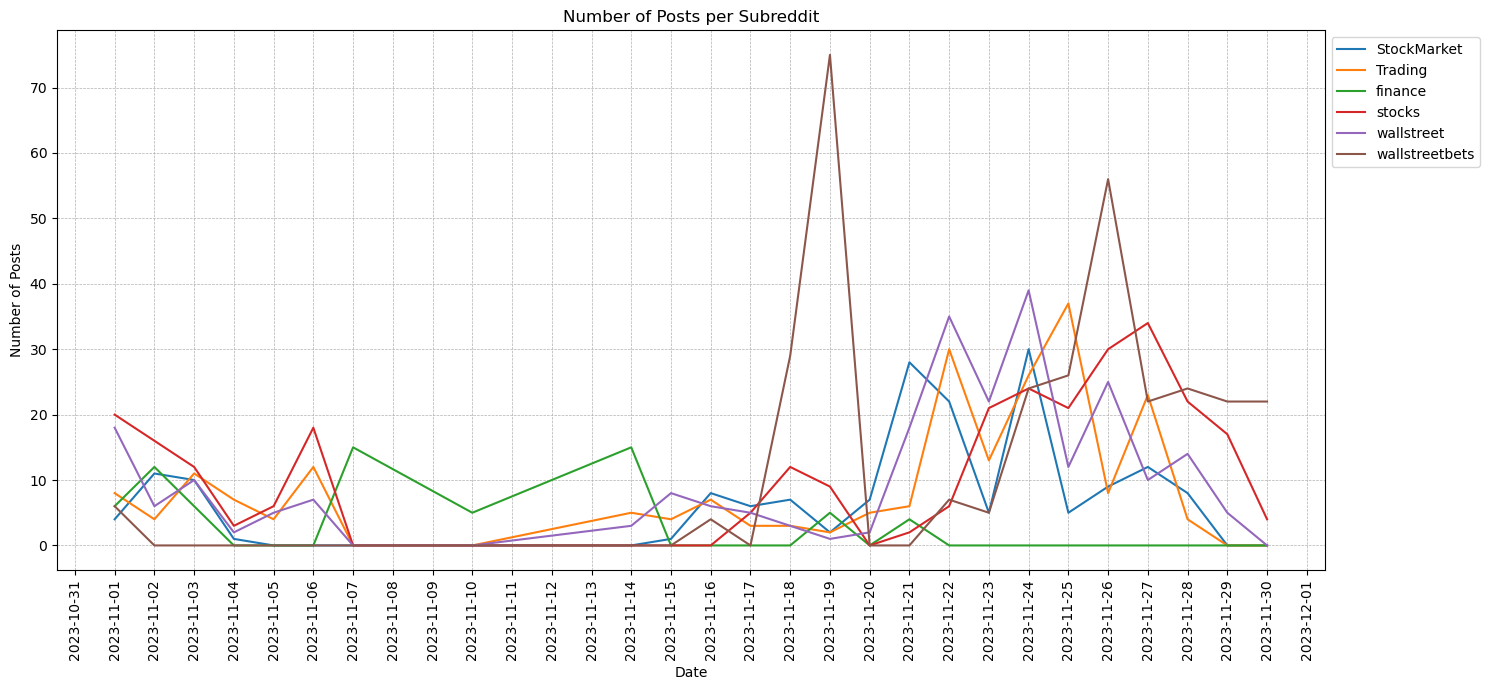

In [6]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

subreddit_data['date'] = pd.to_datetime(subreddit_data['date'])
start_date = "2023-11-01"
end_date = "2023-11-30"
mask = (subreddit_data['date'] >= start_date) & (subreddit_data['date'] <= end_date)
filtered_subreddit_data = subreddit_data.loc[mask]

pivot_data = filtered_subreddit_data.pivot(index='date', columns='subreddit', values='post_count').fillna(0)

plt.figure(figsize=(15, 7))

for subreddit in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[subreddit], label=subreddit)

plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.title("Number of Posts per Subreddit")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()


In [7]:
import psycopg2
import pandas as pd

db_params = {
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost'
}

def fetch_data(query):
    with psycopg2.connect(**db_params) as conn:
        return pd.read_sql_query(query, conn)

import pandas as pd

query = """
    SELECT subreddit, DATE(created_utc) AS date, COUNT(*) AS post_count
    FROM RedditComments
    GROUP BY subreddit, DATE(created_utc)
    ORDER BY subreddit, DATE(created_utc);
"""

subreddit_data_comments = fetch_data(query)


/tmp/ipykernel_243222/3709748738.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)


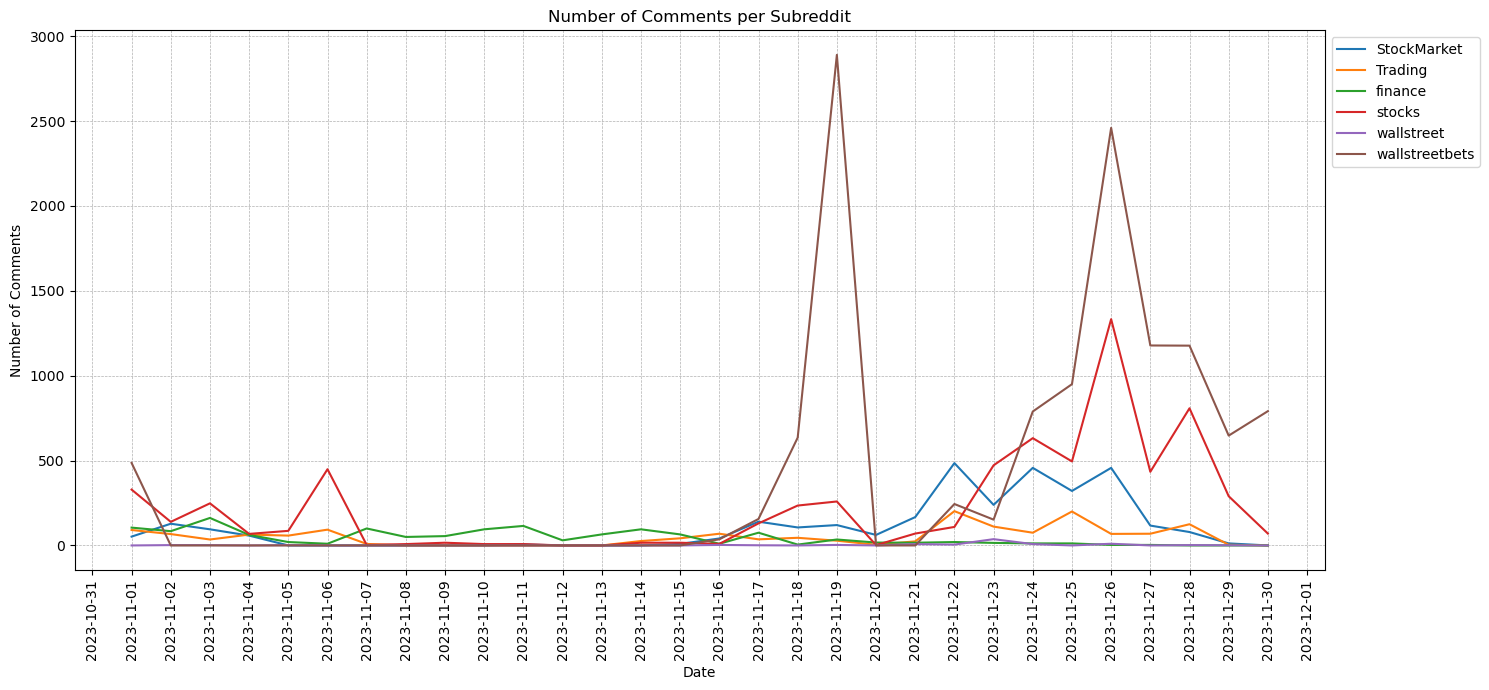

In [9]:

subreddit_data_comments['date'] = pd.to_datetime(subreddit_data_comments['date'])
start_date = "2023-11-01"
end_date = "2023-11-30"
mask = (subreddit_data_comments['date'] >= start_date) & (subreddit_data_comments['date'] <= end_date)
filtered_subreddit_data = subreddit_data_comments.loc[mask]

pivot_data = filtered_subreddit_data.pivot(index='date', columns='subreddit', values='post_count').fillna(0)

plt.figure(figsize=(15, 7))

for subreddit in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[subreddit], label=subreddit)

plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.title("Number of Comments per Subreddit")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=90)

plt.tight_layout() 
plt.show()


/tmp/ipykernel_349729/2324926615.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)


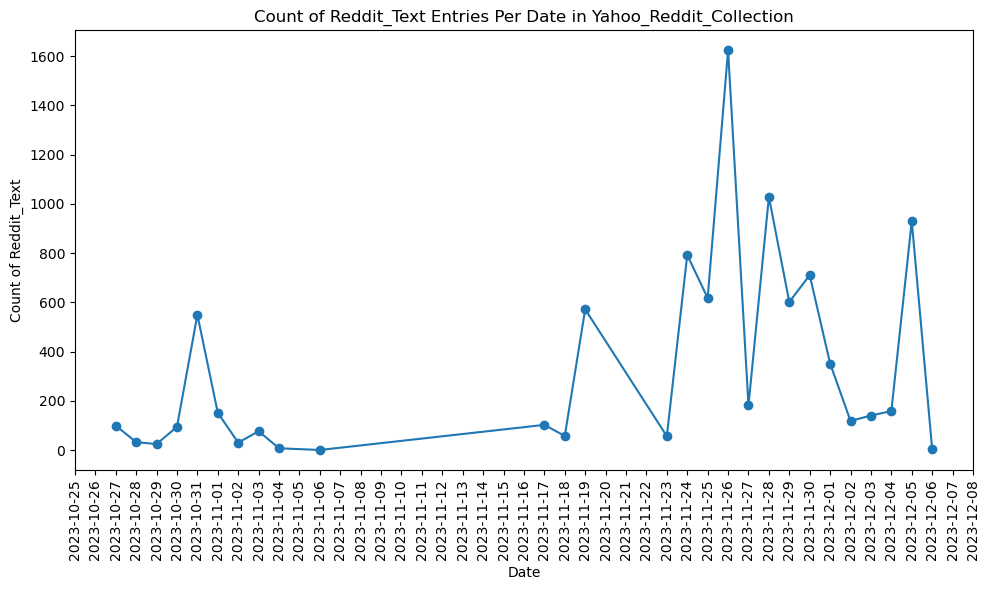

In [4]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


db_params = {
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'postgres',
    'host': 'localhost'
}

def fetch_data(query):
    with psycopg2.connect(**db_params) as conn:
        return pd.read_sql_query(query, conn)

# Modify this query for your Yahoo_Reddit_Collection table
query = """
    SELECT DATE(Reddit_Date) AS date, COUNT(*) AS post_count
    FROM Yahoo_Reddit_Collection
    GROUP BY DATE(Reddit_Date)
    ORDER BY DATE(Reddit_Date);
"""

reddit_data = fetch_data(query)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(reddit_data['date'], reddit_data['post_count'], marker='o')
plt.xlabel('Date')
plt.ylabel('Count of Reddit_Text')
plt.title('Count of Reddit_Text Entries Per Date in Yahoo_Reddit_Collection')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
